### Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn as sk 
import sqlite3
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
pwd

u'/Users/marthataylor/week03_classwork/project-07/starter-code'

In [3]:
sqlite_db = 'starter_code.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()

In [4]:
%load_ext sql
%sql sqlite:///starter_code.sqlite

u'Connected: None@starter_code.sqlite'

#### Step 2: Examine your data 

# Uploading the data and then exploring it

In [5]:
operationsDF = pd.read_csv('../assets/Airport_operations.csv')
cancellationsDF = pd.read_csv('../assets/airport_cancellations.csv')
airportsDF  = pd.read_csv('../assets/airports.csv')

In [6]:
operationsDF.head(2)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [7]:
cancellationsDF.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [8]:
airportsDF.head(2)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No


In [9]:
operationsDF['average airport departure delay'].describe()

count    841.000000
mean      16.249964
std        5.353012
min        6.290000
25%       12.950000
50%       15.220000
75%       17.940000
max       40.870000
Name: average airport departure delay, dtype: float64

In [10]:
#clean up the tables

In [11]:

operationsDF.isnull().sum()

airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64

In [12]:
print airportsDF.describe()
airportsDF.isnull().sum()
#can I fill in data from the other table


               Key     Latitude    Longitude
count  5164.000000  5164.000000  5164.000000
mean   2786.645236    40.669348   -98.817645
std    1493.693985     7.988298    20.953579
min     203.000000    17.701556  -177.381308
25%            NaN          NaN          NaN
50%            NaN          NaN          NaN
75%            NaN          NaN          NaN
max    5375.000000    71.284889   -64.801722


//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Key                           3
LocID                        15
AP_NAME                       3
ALIAS                      1669
Facility Type                 3
FAA REGION                    3
COUNTY                        3
CITY                          3
STATE                         3
AP Type                       3
Latitude                      3
Longitude                     3
Boundary Data Available       3
dtype: int64

In [13]:
print cancellationsDF.describe()
cancellationsDF.isnull().sum()

              Year  Departure Cancellations  Arrival Cancellations  \
count   805.000000               805.000000             805.000000   
mean   2008.986335              1292.038509            1333.124224   
std       3.158116              1835.961943            1975.224868   
min    2004.000000                 0.000000               0.000000   
25%    2006.000000               349.000000             314.000000   
50%    2009.000000               663.000000             642.000000   
75%    2012.000000              1472.000000            1523.000000   
max    2014.000000             16618.000000           17571.000000   

       Departure Diversions  Arrival Diversions  
count            805.000000          805.000000  
mean             173.315528          169.413665  
std              172.345539          228.521615  
min                0.000000            0.000000  
25%               62.000000           41.000000  
50%              110.000000           84.000000  
75%              23

Airport                    0
Year                       0
Departure Cancellations    0
Arrival Cancellations      0
Departure Diversions       0
Arrival Diversions         0
dtype: int64

In [14]:
for column in airportsDF.columns:
    print column, airportsDF[column].isnull().any()

Key True
LocID True
AP_NAME True
ALIAS True
Facility Type True
FAA REGION True
COUNTY True
CITY True
STATE True
AP Type True
Latitude True
Longitude True
Boundary Data Available True


# creating the sql tables

In [15]:
c.execute("DROP TABLE operations;")
c.execute("DROP TABLE cancellations")
c.execute("DROP TABLE airports")

In [16]:
print operationsDF.columns
print operationsDF.shape

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')
(841, 15)


In [17]:
create_operations="CREATE TABLE operations(airport varchar, year varchar, departures_for_metric_computation real, arrivals_for_metric_computation real, percent_on_time_gatedepartures real, percent_on_time_airport_departures real,percent_on_time_gate_arrivals real, average_gate_departure_delay real, average_taxi_out_time real, average_taxi_out_delay real, average_airport_departure_delay real,average_airborne_delay real, average_taxi_indelay real, average_block_delay real, average_gate_arrival_delay real);"
c.execute(create_operations)
conn.commit()

In [18]:
print cancellationsDF.columns
print cancellationsDF.shape

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')
(805, 6)


In [19]:
create_cancellations ="CREATE TABLE cancellations(Airport varchar, Year varchar, Departure_Cancellations real, Arrival_Cancellations real, Departure_Diversions real, Arrival_Diversions real)"

In [20]:
c.execute(create_cancellations)
conn.commit()

In [21]:
print airportsDF.columns
print airportsDF.shape


Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')
(5167, 13)


In [22]:
create_airports="CREATE TABLE airports(Key varchar, LocID varchar,AP_NAME varchar, ALIAS varchar, Facility Type varchar, FAA REGION varchar, COUNTY varchar, CITY varchar, STATE varchar, AP_Type varchar, Latitude real, Longitude real,'Boundary_Data_Available')"

In [23]:
c.execute(create_airports)

In [24]:
conn.text_factory = str

In [25]:
c.executemany("INSERT INTO airports VALUES (?, ?, ?,?,?,?,?,?,?,?,?,?,?)", airportsDF.values)

In [26]:
conn.commit()

In [27]:
# path = unicode(path)

In [28]:
%%sql 
SELECT * FROM airports LIMIT 2;

Done.


Key,LocID,AP_NAME,ALIAS,Facility,FAA,COUNTY,CITY,STATE,AP_Type,Latitude,Longitude,Boundary_Data_Available
3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.01933,No


In [29]:
# results = c.execute("SELECT * FROM airports;")
# results.fetchall()

In [30]:
cancellationsDF.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [31]:
c.executemany("INSERT INTO cancellations VALUES (?, ?, ?,?,?,?)", cancellationsDF.values)

In [32]:
conn.commit()

In [33]:
%%sql 
SELECT * FROM cancellations LIMIT 2;

Done.


Airport,Year,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions
ABQ,2004.0,242.0,235.0,71.0,46.0
ABQ,2005.0,221.0,190.0,61.0,33.0


In [34]:
operationsDF.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [35]:
c.executemany("INSERT INTO operations VALUES (?, ?, ?,?,?,?,?,?,?,?,?,?,?,?,?)", operationsDF.values)

In [36]:
conn.commit()

In [37]:
%%sql 
SELECT * FROM operations LIMIT 2;

Done.


airport,year,departures_for_metric_computation,arrivals_for_metric_computation,percent_on_time_gatedepartures,percent_on_time_airport_departures,percent_on_time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_indelay,average_block_delay,average_gate_arrival_delay
ABQ,2004,53971.0,53818.0,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
ABQ,2005,51829.0,51877.0,0.814,0.7922,0.8001,9.6,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [38]:
# %%sql

# "CREATE TABLE cancellations(Airport varchar, Year varchar, 
# Departure_Cancellations varchar, Arrival_Cancellations varchar, 
# Departure_Diversions varchar, Arrival_Diversions varchar)"

# create_Joined="CREATE TABLE joinedTable(Key varchar, LocID varchar,AP_NAME varchar, 
# ALIAS varchar, Facility Type varchar, FAA REGION varchar, 
# COUNTY varchar, CITY varchar, STATE varchar, AP_Type varchar, Latitude varchar, Longitude varchar,
# 'Boundary_Data_Available')"

In [39]:
%%sql

SELECT * FROM cancellations AS c, airports AS a, operations as o
WHERE c.LocID = a.airport = o.airport LIMIT 10;

(sqlite3.OperationalError) no such column: c.LocID [SQL: u'SELECT * FROM cancellations AS c, airports AS a, operations as o\nWHERE c.LocID = a.airport = o.airport LIMIT 10;']


In [40]:
%%sql
SELECT * FROM airports LEFT OUTER JOIN cancellations ON airports.LocID= cancellations.airport LEFT OUTER JOIN operations ON airports.LocID  = operations.Airport LIMIT 1;


Done.


Key,LocID,AP_NAME,ALIAS,Facility,FAA,COUNTY,CITY,STATE,AP_Type,Latitude,Longitude,Boundary_Data_Available,Airport,Year,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions,airport,year,departures_for_metric_computation,arrivals_for_metric_computation,percent_on_time_gatedepartures,percent_on_time_airport_departures,percent_on_time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_indelay,average_block_delay,average_gate_arrival_delay
3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [41]:
 
#firstJoin = c.execute('SELECT * FROM airports LEFT OUTER JOIN cancellations ON LocID= cancellations.airport LEFT OUTER JOIN operations ON LocID  = operations.Airport;')

In [42]:
firstJoin = c.execute('SELECT * FROM airports JOIN cancellations ON airports.LocID= cancellations.airport JOIN operations ON airports.LocID  = operations.Airport;')

In [43]:
#firstJoin.description

In [44]:
everything =firstJoin.fetchall()

In [45]:
col_names=[description[0] for description in firstJoin.description]

In [46]:
df=pd.DataFrame(everything, columns=col_names)

In [47]:
stuff =pd.DataFrame(everything)

In [48]:
df.tail(1)

,Key,LocID,AP_NAME,ALIAS,Facility,FAA,COUNTY,CITY,STATE,AP_Type,...,percent_on_time_airport_departures,percent_on_time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_indelay,average_block_delay,average_gate_arrival_delay
8788,246.0,ANC,TED STEVENS ANCHORAGE INTL,Ted Stevens Anchorage Int'l Airport,Airport,AAL,ANCHORAGE,ANCHORAGE,AK,Federalized/Commercial,...,0.8074,0.86,11.33,11.33,1.33,12.34,4.09,0.54,4.57,10.82


In [49]:
#Key varchar, LocID varchar,AP_NAME varchar, ALIAS varchar, Facility Type varchar, FAA REGION varchar, COUNTY varchar, CITY varchar, STATE varchar, AP_Type varchar, Latitude varchar, Longitude varchar,'Boundary_Data_Available

In [50]:
df.shape

(8789, 34)

In [51]:
df.describe()


,Latitude,Longitude,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions,departures_for_metric_computation,arrivals_for_metric_computation,percent_on_time_gatedepartures,percent_on_time_airport_departures,percent_on_time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_indelay,average_block_delay,average_gate_arrival_delay
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,36.448807,-94.899998,1299.328706,1341.021277,174.227216,170.384117,113462.406531,112995.271248,0.778950,0.726757,0.766806,12.898230,13.873027,3.680732,15.712726,2.876105,1.413830,3.290090,13.436961
std,6.682976,20.633247,1839.807086,1979.344326,172.550372,228.966130,98013.586104,97659.402573,0.051989,0.075708,0.050351,3.020389,3.804768,2.338027,4.348108,1.168646,0.854782,0.987058,3.244237
min,18.439295,-157.922429,0.000000,0.000000,0.000000,0.000000,360.000000,486.000000,0.529900,0.380800,0.513600,5.350000,7.040000,0.100000,6.290000,0.950000,0.000000,1.230000,6.330000
25%,32.896828,-111.977773,349.000000,314.000000,62.000000,41.000000,41845.000000,41844.000000,0.753000,0.691800,0.742200,10.840000,11.470000,2.300000,12.890000,2.040000,0.840000,2.620000,11.270000
50%,37.618972,-87.897068,670.000000,653.000000,111.000000,85.000000,79489.000000,79750.000000,0.783800,0.740200,0.770500,12.540000,12.940000,3.050000,15.100000,2.620000,1.140000,3.130000,12.970000
75%,40.795250,-80.152741,1484.000000,1549.000000,238.000000,190.000000,166479.000000,165955.000000,0.810700,0.773500,0.797600,14.620000,15.750000,4.230000,17.560000,3.560000,1.780000,3.800000,14.940000
max,61.174083,-66.002004,16618.000000,17571.000000,1064.000000,1948.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000


In [52]:
df.head(1)

,Key,LocID,AP_NAME,ALIAS,Facility,FAA,COUNTY,CITY,STATE,AP_Type,...,percent_on_time_airport_departures,percent_on_time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_indelay,average_block_delay,average_gate_arrival_delay
0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,...,0.7794,0.7984,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28


# data exploration

In [53]:
#rename columns since some dups
df.columns=[['Key', 'LocID', 'AP_NAME', 'ALIAS', 'Facility', 'FAA', 'COUNTY',
       'CITY', u'STATE', u'AP_Type', 'Latitude', u'Longitude',
       'Boundary_Data_Available', 'Airport', 'Year',
       'Departure_Cancellations', 'Arrival_Cancellations',
       'Departure_Diversions', 'Arrival_Diversions', 'airport', 'year',
       'departures_for_metric_computation',
       'arrivals_for_metric_computation', 'percent_on_time_gatedepartures',
       'percent_on_time_airport_departures', 'percent_on_time_gate_arrivals',
       'average_gate_departure_delay', 'average_taxi_out_time',
       'average_taxi_out_delay', 'average_airport_departure_delay',
       'average_airborne_delay', 'average_taxi_indelay',
       'average_block_delay', 'average_gate_arrival_delay']]

In [54]:
#look at each column - see number of unique items within a column and to see
#if any data needs to be converted to float or integers
airportColumns=[]
i=0
for labels in df.columns:
    if i>0:
        airportColumns.append(labels)
        i = i + 1
    else:
        i=i+1
        
for item in airportColumns:
    print 'For %s ' %item
    print df[item].isnull().sum()
    print df[item].describe()
    print ''

For LocID 
0
count     8789
unique      74
top        LGA
freq       121
Name: LocID, dtype: object

For AP_NAME 
0
count                 8789
unique                  74
top       SAN ANTONIO INTL
freq                   121
Name: AP_NAME, dtype: object

For ALIAS 
0
count                          8789
unique                           74
top       San Antonio Int'l Airport
freq                            121
Name: ALIAS, dtype: object

For Facility 
0
count        8789
unique          1
top       Airport
freq         8789
Name: Facility, dtype: object

For FAA 
0
count     8789
unique       9
top        AWP
freq      1947
Name: FAA, dtype: object

For COUNTY 
0
count            8789
unique             63
top       LOS ANGELES
freq              363
Name: COUNTY, dtype: object

For CITY 
0
count         8789
unique          69
top       NEW YORK
freq           363
Name: CITY, dtype: object

For STATE 
0
count     8789
unique      36
top         CA
freq      1342
Name: STATE, dtype: object

In [55]:
#rename columns since some dups
df.columns=[['Key', 'LocID', 'AP_NAME', 'ALIAS', 'Facility', 'FAA', 'COUNTY',
       'CITY', 'STATE', 'AP_Type', 'Latitude', 'Longitude',
       'Boundary_Data_Available', 'Airport', 'Year',
       'Departure_Cancellations', 'Arrival_Cancellations',
       'Departure_Diversions', 'Arrival_Diversions', 'airportReduntant', 'yearRedundant',
       'departures_for_metric_computation',
       'arrivals_for_metric_computation', 'percent_on_time_gatedepartures',
       'percent_on_time_airport_departures', 'percent_on_time_gate_arrivals',
       'average_gate_departure_delay', 'average_taxi_out_time',
       'average_taxi_out_delay', 'average_airport_departure_delay',
       'average_airborne_delay', 'average_taxi_indelay',
       'average_block_delay', 'average_gate_arrival_delay']]

In [56]:
df.columns

Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility', u'FAA', u'COUNTY',
       u'CITY', u'STATE', u'AP_Type', u'Latitude', u'Longitude',
       u'Boundary_Data_Available', u'Airport', u'Year',
       u'Departure_Cancellations', u'Arrival_Cancellations',
       u'Departure_Diversions', u'Arrival_Diversions', u'airportReduntant',
       u'yearRedundant', u'departures_for_metric_computation',
       u'arrivals_for_metric_computation', u'percent_on_time_gatedepartures',
       u'percent_on_time_airport_departures', u'percent_on_time_gate_arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average_taxi_out_delay', u'average_airport_departure_delay',
       u'average_airborne_delay', u'average_taxi_indelay',
       u'average_block_delay', u'average_gate_arrival_delay'],
      dtype='object')

In [57]:
#getting rid of redundant data year and airport
#also Facility - there is only one type of facility in data set 
#got rid of alias - does the alias really matter. Renaming of airport happen periodically
#National Airport is now Ronald Reagan 
#got rid of faa since it was unique
#got rid boundry since unique
#got rid of airport type since only two types and after examining the information they were not
#logical

dfEdited=df[['LocID','AP_NAME',
       'CITY', 'STATE', 'Latitude', 'Longitude',
       'Airport', 'Year',
       'Departure_Cancellations', 'Arrival_Cancellations',
       'Departure_Diversions', 'Arrival_Diversions',
       'departures_for_metric_computation',
       'arrivals_for_metric_computation', 'percent_on_time_gatedepartures',
       'percent_on_time_airport_departures', 'percent_on_time_gate_arrivals',
       'average_gate_departure_delay', 'average_taxi_out_time',
       'average_taxi_out_delay', 'average_airport_departure_delay',
       'average_airborne_delay', 'average_taxi_indelay',
       'average_block_delay', 'average_gate_arrival_delay']]

In [58]:
#convert to float or integer

#convert data  to float or integers
airportColumns=[]
for labels in dfEdited.columns:
    if i>0:
        airportColumns.append(labels)
        i = i + 1
    else:
        i=i+1
        
for item in airportColumns:
    print 'For %s ' %item
    print dfEdited[item].isnull().sum()
    print dfEdited[item].describe()
    print ''


For LocID 
0
count     8789
unique      74
top        LGA
freq       121
Name: LocID, dtype: object

For AP_NAME 
0
count                 8789
unique                  74
top       SAN ANTONIO INTL
freq                   121
Name: AP_NAME, dtype: object

For CITY 
0
count         8789
unique          69
top       NEW YORK
freq           363
Name: CITY, dtype: object

For STATE 
0
count     8789
unique      36
top         CA
freq      1342
Name: STATE, dtype: object

For Latitude 
0
count    8789.000000
mean       36.448807
std         6.682976
min        18.439295
25%        32.896828
50%        37.618972
75%        40.795250
max        61.174083
Name: Latitude, dtype: float64

For Longitude 
0
count    8789.000000
mean      -94.899998
std        20.633247
min      -157.922429
25%      -111.977773
50%       -87.897068
75%       -80.152741
max       -66.002004
Name: Longitude, dtype: float64

For Airport 
0
count     8789
unique      74
top        LGA
freq       121
Name: Airport, dtype:

In [59]:
dfEdited.head(1)

,LocID,AP_NAME,CITY,STATE,Latitude,Longitude,Airport,Year,Departure_Cancellations,Arrival_Cancellations,...,percent_on_time_airport_departures,percent_on_time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_indelay,average_block_delay,average_gate_arrival_delay
0,SJU,LUIS MUNOZ MARIN INTL,SAN JUAN,PR,18.439295,-66.002004,SJU,2004.0,330.0,289.0,...,0.7794,0.7984,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28


In [60]:
df['AP_Type'].value_counts()

Federalized/Commercial    8228
Public Use                 561
Name: AP_Type, dtype: int64

In [61]:
dfEdited.columns

Index([u'LocID', u'AP_NAME', u'CITY', u'STATE', u'Latitude', u'Longitude',
       u'Airport', u'Year', u'Departure_Cancellations',
       u'Arrival_Cancellations', u'Departure_Diversions',
       u'Arrival_Diversions', u'departures_for_metric_computation',
       u'arrivals_for_metric_computation', u'percent_on_time_gatedepartures',
       u'percent_on_time_airport_departures', u'percent_on_time_gate_arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average_taxi_out_delay', u'average_airport_departure_delay',
       u'average_airborne_delay', u'average_taxi_indelay',
       u'average_block_delay', u'average_gate_arrival_delay'],
      dtype='object')

In [62]:
#Sending data to csv for tableau
dfEdited.to_csv('dfEdited.csv')

### Intro: Write a problem statement / aim for this project

#### 1.2 What are the risks and assumptions of our data? 

### Part 1: Exploratory Data Analysis

#### 1.1 Plot and Describe the Data

In [63]:
#creating dataframe for pairplots

dfNumerical=dfEdited[[ 'Latitude', 'Longitude',
       'Departure_Cancellations',
       'Arrival_Cancellations', 'Departure_Diversions',
       'Arrival_Diversions', 'departures_for_metric_computation',
       'arrivals_for_metric_computation', 'percent_on_time_gatedepartures',
       'percent_on_time_airport_departures', 'percent_on_time_gate_arrivals',
       'average_gate_departure_delay', 'average_taxi_out_time',
       'average_taxi_out_delay', 'average_airport_departure_delay',
       'average_airborne_delay', 'average_taxi_indelay',
       'average_block_delay', 'average_gate_arrival_delay']]

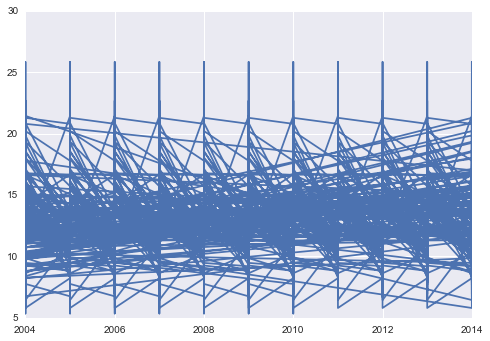

In [65]:
plt.plot(dfEdited['Year'], dfEdited['average_gate_departure_delay'])

In [66]:
#I better do a pivot plot table
byAirportMean=pd.pivot_table(dfEdited, index='Airport', values=['average_gate_departure_delay',
                            'average_airport_departure_delay'],aggfunc=np.mean)
byAirportMean.reset_index(inplace=True)
byAirportMean

,Airport,average_airport_departure_delay,average_gate_departure_delay
0,ABQ,12.534545,10.964545
1,ANC,16.006364,14.769091
2,ATL,20.069091,13.477273
3,AUS,13.444545,11.893636
4,BDL,14.011818,11.766364
5,BHM,15.082727,13.234545
6,BNA,14.640909,12.921818
7,BOS,17.292727,12.916364
8,BUF,16.894545,14.830000
9,BUR,11.926364,10.445455


In [83]:
byAirportMean=pd.pivot_table(dfEdited, index='Airport', values=['average_gate_departure_delay',
                            'average_airport_departure_delay'],aggfunc= np.std)
byAirportMean.reset_index(inplace=True)
byAirportMean

,Airport,average_airport_departure_delay,average_gate_departure_delay
0,ABQ,1.441081,1.344041
1,ANC,3.733520,3.525824
2,ATL,3.181510,1.950931
3,AUS,1.193081,1.115633
4,BDL,1.160517,1.036600
5,BHM,1.189000,1.174942
6,BNA,1.432283,1.335690
7,BOS,1.855928,1.413581
8,BUF,1.407642,1.210757
9,BUR,1.437106,1.098419


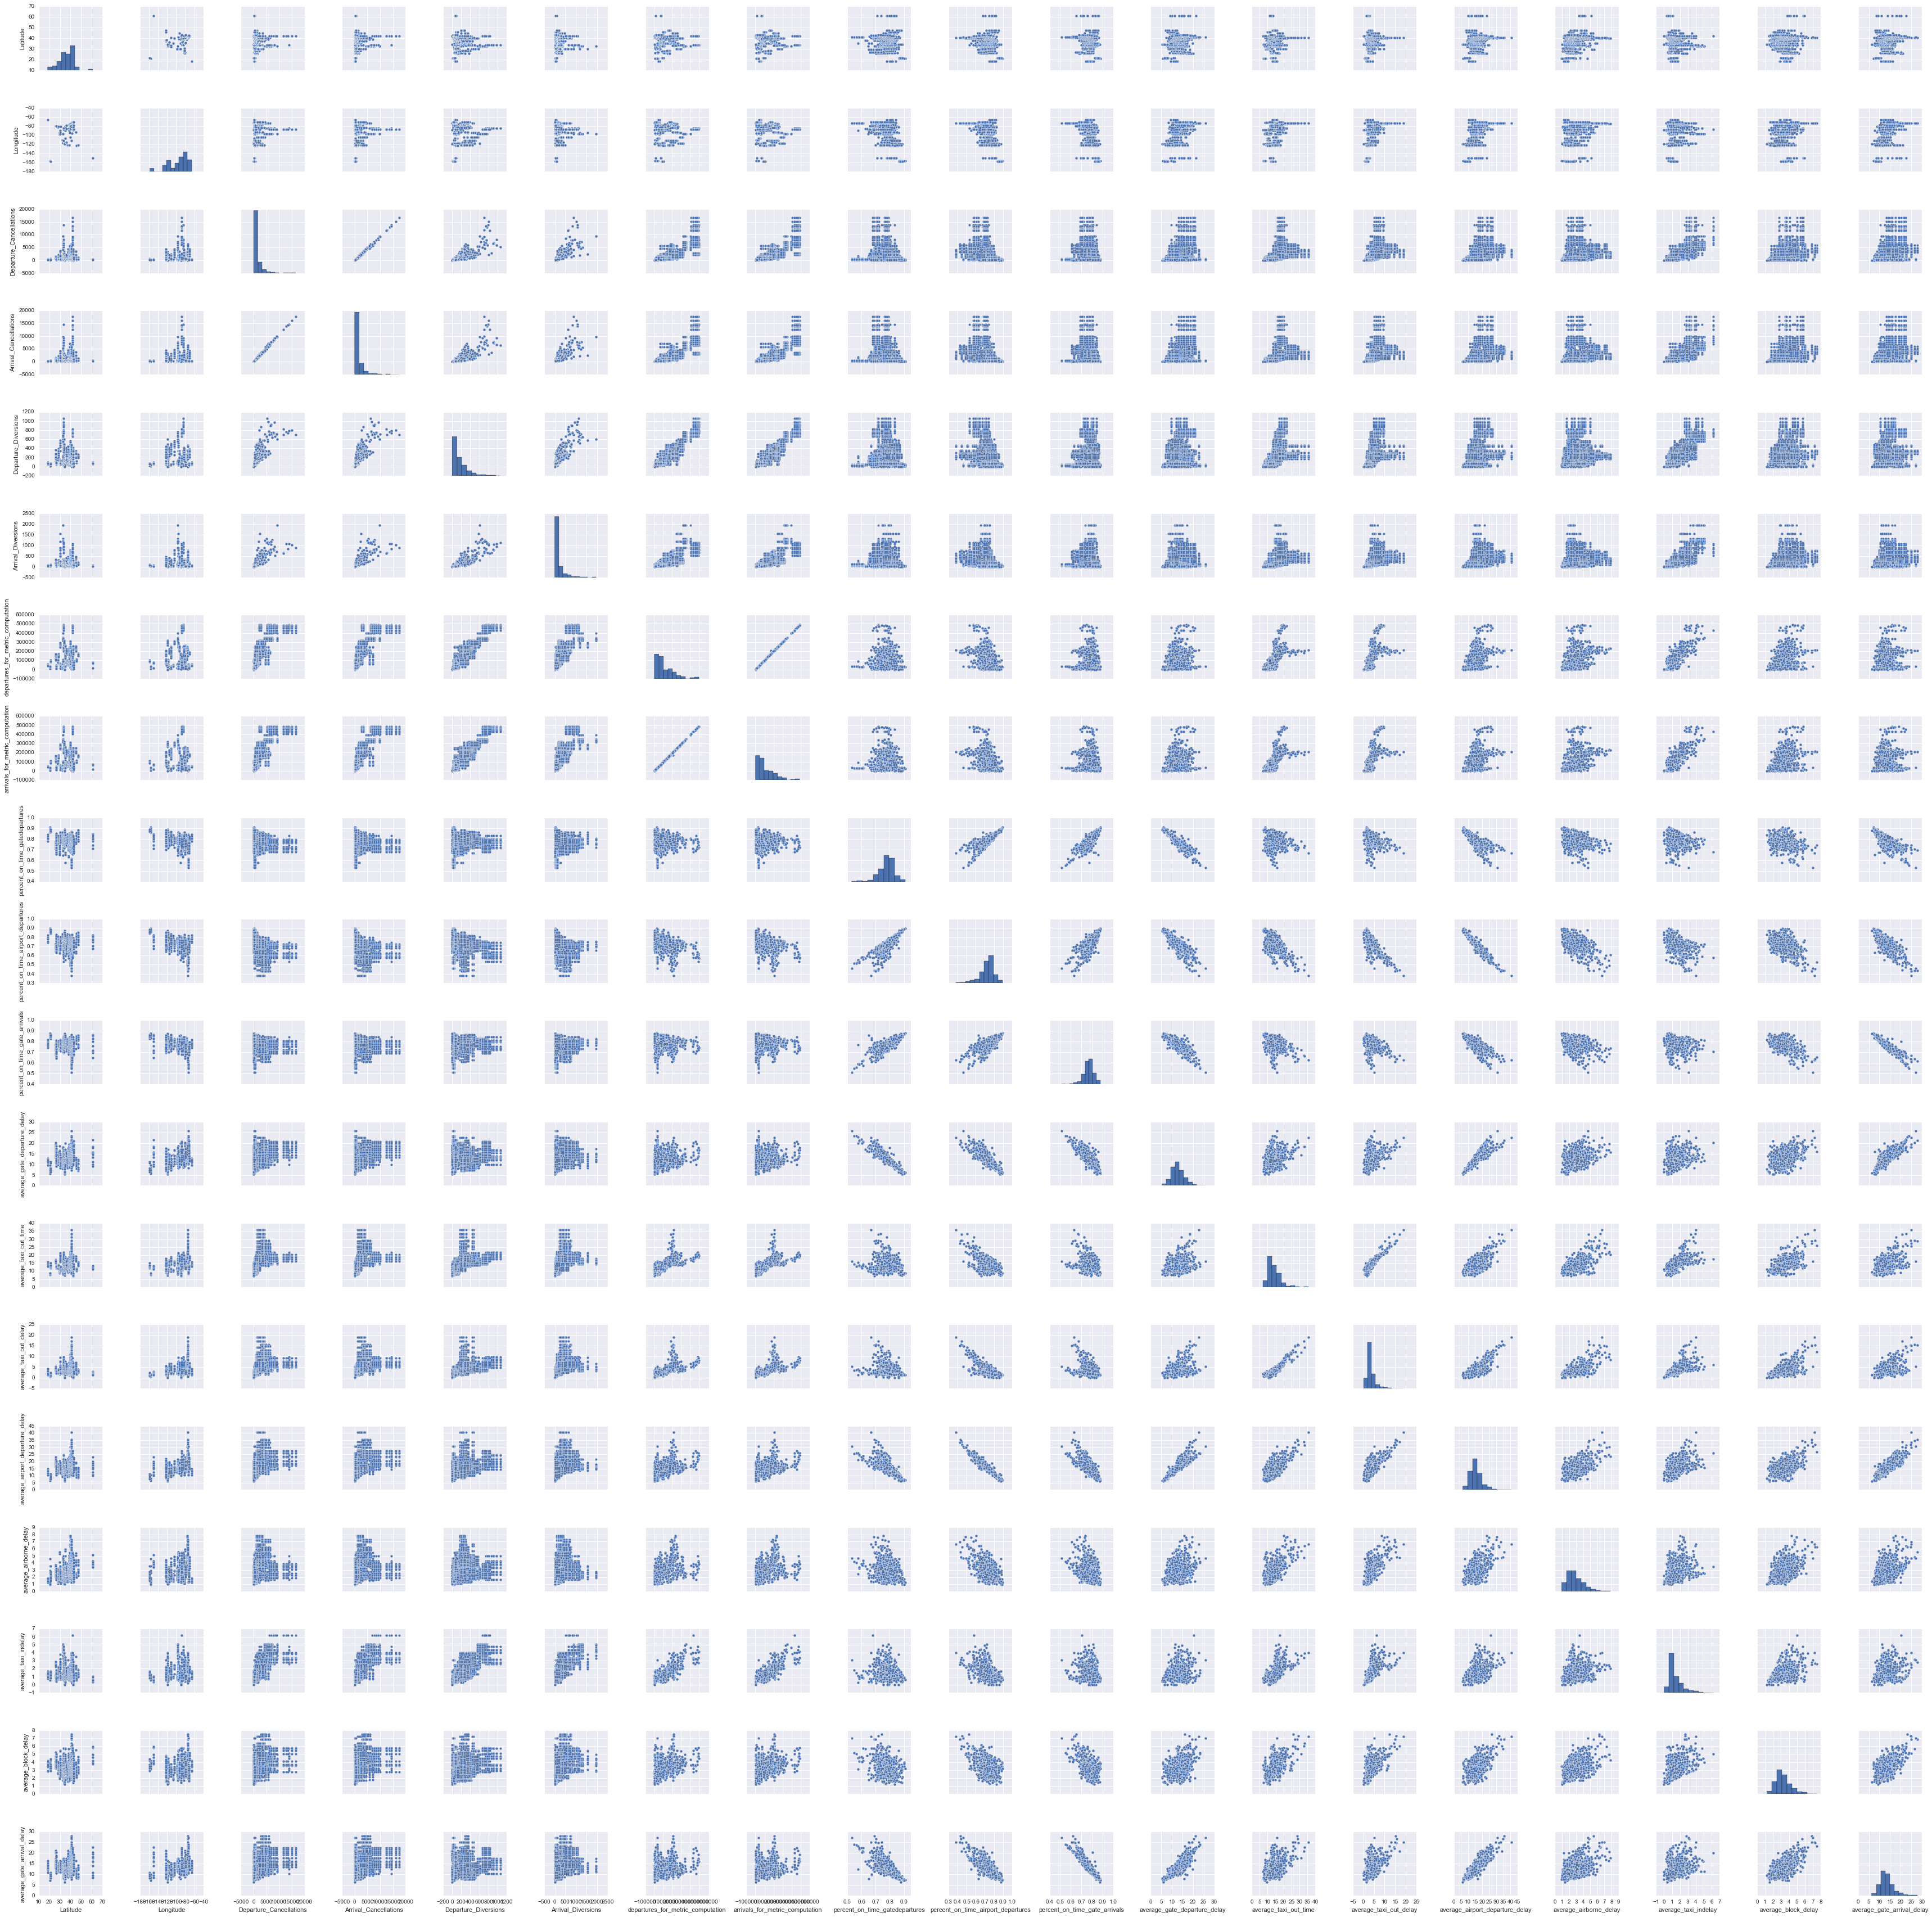

In [68]:
sns.pairplot(dfNumerical)

#### Are there any unique values? 

In [69]:
#there were, I eliminated them, see above

### Part 2: Data Mining

#### 2.1 Create Dummy Variables

In [70]:
dummiesByAirport=pd.get_dummies(dfEdited['Airport'])
dummiesByAirport.head()

,ABQ,ANC,ATL,AUS,BDL,BHM,BNA,BOS,BUF,BUR,...,SFO,SJC,SJU,SLC,SMF,SNA,STL,SWF,TPA,TUS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
x=pd.DataFrame(dfNumerical).join(pd.DataFrame(dummiesByAirport))
y=x['average_airport_departure_delay']
x=x.drop('average_airport_departure_delay',1)


In [89]:
print x.shape
x.head()

(8789, 92)


,Latitude,Longitude,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions,departures_for_metric_computation,arrivals_for_metric_computation,percent_on_time_gatedepartures,percent_on_time_airport_departures,...,SFO,SJC,SJU,SLC,SMF,SNA,STL,SWF,TPA,TUS
0,18.439295,-66.002004,330.0,289.0,55.0,28.0,60371.0,56735.0,0.8019,0.7794,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18.439295,-66.002004,330.0,289.0,55.0,28.0,57736.0,54870.0,0.7789,0.7464,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.439295,-66.002004,330.0,289.0,55.0,28.0,55707.0,52948.0,0.8054,0.7446,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.439295,-66.002004,330.0,289.0,55.0,28.0,47987.0,47246.0,0.8014,0.7522,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.439295,-66.002004,330.0,289.0,55.0,28.0,44493.0,43448.0,0.8004,0.7810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
print y.shape
y.head()

(8789,)


0    12.43
1    14.43
2    14.34
3    14.97
4    13.59
Name: average_airport_departure_delay, dtype: float64

#### 2.2 Format and Clean the Data

In [73]:
#already did it

### Part 3: Define the Data

#### 3.1 Confirm that the dataset has a normal distribution. How can you tell? 

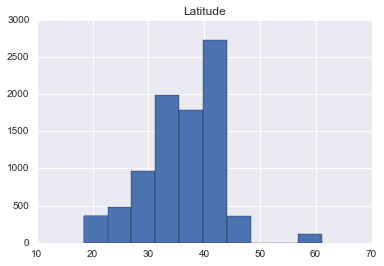

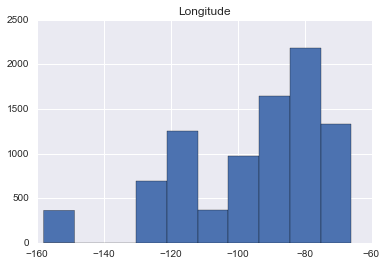

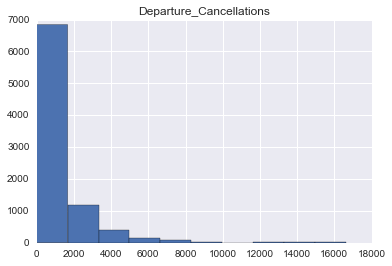

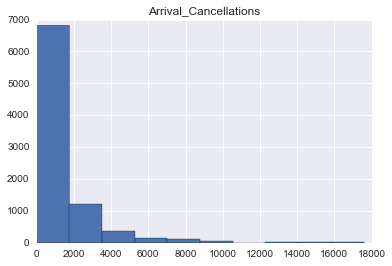

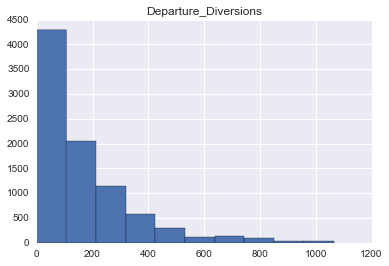

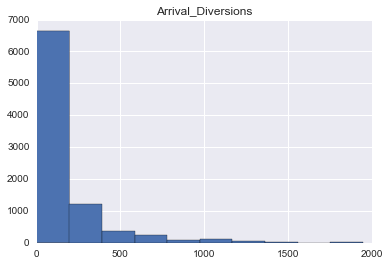

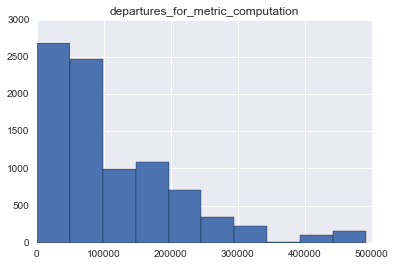

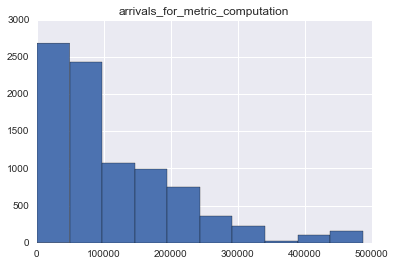

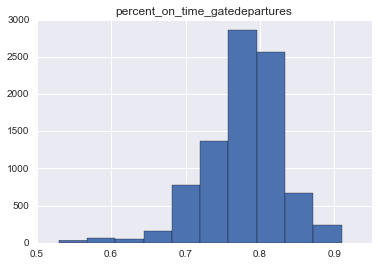

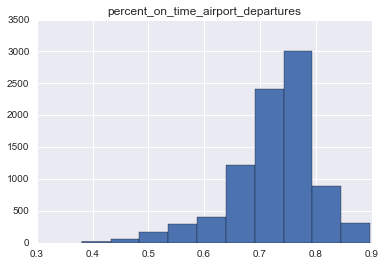

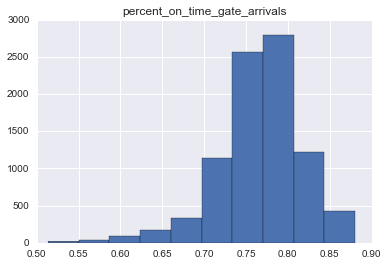

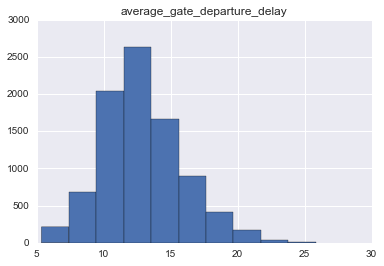

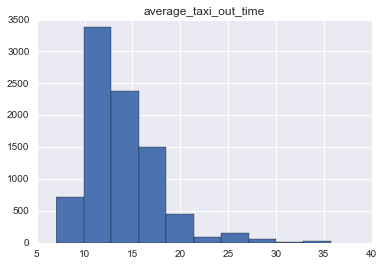

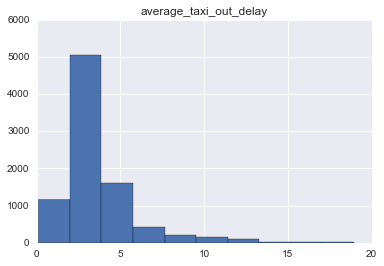

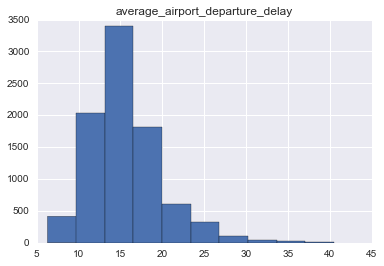

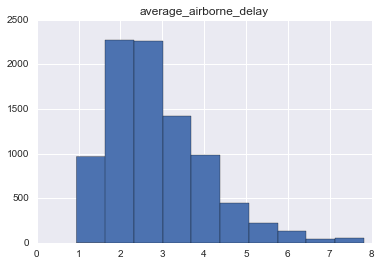

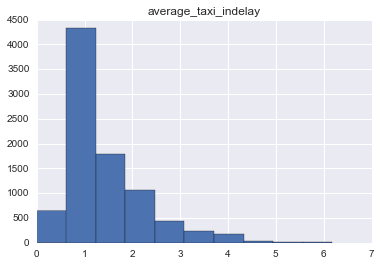

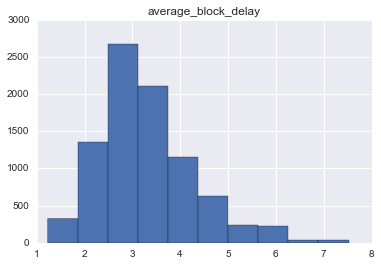

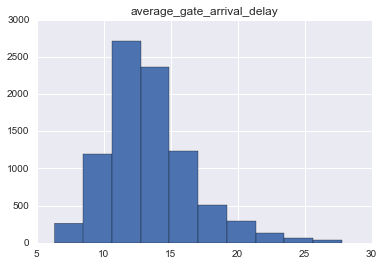

In [91]:
airportColumns=[]
for labels in dfNumerical.columns:
    if i>0:
        airportColumns.append(labels)
        i = i + 1
    else:
        i=i+1
        
for item in airportColumns:
    plt.hist(dfEdited[item])
    plt.title(item)
    plt.show()
#plt.hist(dfEdited['Departure_Cancellations'])

#### 3.2 Find correlations in the data

In [74]:
corr=dfEdited.corr()
corr

,Latitude,Longitude,Departure_Cancellations,Arrival_Cancellations,Departure_Diversions,Arrival_Diversions,departures_for_metric_computation,arrivals_for_metric_computation,percent_on_time_gatedepartures,percent_on_time_airport_departures,percent_on_time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_indelay,average_block_delay,average_gate_arrival_delay
Latitude,1.000000,0.076260,0.122314,0.121975,0.028345,0.005317,0.091475,0.091008,-0.147831,-0.216738,-0.138215,0.209330,0.179024,0.178104,0.240119,0.381492,-0.020586,0.090826,0.201165
Longitude,0.076260,1.000000,0.159461,0.145119,0.065356,0.104482,0.070826,0.069961,-0.425215,-0.473103,-0.445045,0.489446,0.331691,0.307864,0.505052,0.237869,0.145350,0.165698,0.463421
Departure_Cancellations,0.122314,0.159461,1.000000,0.997464,0.796380,0.792203,0.788321,0.789588,-0.130024,-0.405445,-0.036128,0.231757,0.539168,0.551812,0.437764,0.307812,0.694450,0.309201,0.242156
Arrival_Cancellations,0.121975,0.145119,0.997464,1.000000,0.814385,0.793721,0.801544,0.802692,-0.122757,-0.395775,-0.021566,0.220322,0.533254,0.541890,0.424703,0.299797,0.700557,0.305255,0.227197
Departure_Diversions,0.028345,0.065356,0.796380,0.814385,1.000000,0.840282,0.921107,0.920735,-0.039201,-0.331057,0.095999,0.109586,0.550588,0.522584,0.334319,0.250697,0.785177,0.288844,0.095103
Arrival_Diversions,0.005317,0.104482,0.792203,0.793721,0.840282,1.000000,0.784432,0.785027,-0.112587,-0.383238,0.020735,0.178753,0.520622,0.528343,0.389239,0.273009,0.746750,0.304004,0.161344
departures_for_metric_computation,0.091475,0.070826,0.788321,0.801544,0.921107,0.784432,1.000000,0.999807,-0.059606,-0.398249,0.105279,0.128983,0.638507,0.604875,0.390637,0.401119,0.822914,0.360050,0.100195
arrivals_for_metric_computation,0.091008,0.069961,0.789588,0.802692,0.920735,0.785027,0.999807,1.000000,-0.059065,-0.397344,0.105832,0.127448,0.636526,0.604187,0.389262,0.399790,0.821930,0.356813,0.098915
percent_on_time_gatedepartures,-0.147831,-0.425215,-0.130024,-0.122757,-0.039201,-0.112587,-0.059606,-0.059065,1.000000,0.817124,0.781125,-0.911994,-0.164681,-0.212128,-0.762510,-0.263020,-0.161291,-0.338179,-0.711137
percent_on_time_airport_departures,-0.216738,-0.473103,-0.405445,-0.395775,-0.331057,-0.383238,-0.398249,-0.397344,0.817124,1.000000,0.694158,-0.825356,-0.650858,-0.726968,-0.954502,-0.557183,-0.495273,-0.559185,-0.752387


#### 3.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 3.4 Validate your findings using statistical analysis

#### 3.5 How can you improve your overall analysis? 

Answer: 

### Part 4: Perform a PCA and Present Findings

#### 4.1 Conduct the PCA

In [92]:
#
xScaled=StandardScaler().fit_transform(dfNumerical)

In [107]:

pca=PCA(n_components=2)
pca_x=pca.fit_transform(xScaled)
print pca_x[0:5]
joinedPCA_Y=pd.DataFrame(pca_x).join(pd.DataFrame(y))
print joinedPCA_Y.head()
corr=joinedPCA_Y.corr()
corr

[[-2.15517784 -0.05882423]
 [-1.07431811 -1.01226475]
 [-0.99059571 -0.69466854]
 [-0.82890795 -1.12695966]
 [-1.57806575 -0.89351249]]
          0         1  average_airport_departure_delay
0 -2.155178 -0.058824                            12.43
1 -1.074318 -1.012265                            14.43
2 -0.990596 -0.694669                            14.34
3 -0.828908 -1.126960                            14.97
4 -1.578066 -0.893512                            13.59


,0,1,average_airport_departure_delay
0,1.000000e+00,2.236923e-16,0.858864
1,2.236923e-16,1.000000e+00,-0.460049
average_airport_departure_delay,8.588645e-01,-4.600487e-01,1.000000


In [94]:
pca_x.shape

(8789, 2)

In [98]:
joinedPCA_Y=pd.DataFrame(pca_x).join(pd.DataFrame(y))

In [100]:
joinedPCA_Y.head()

,0,1,average_airport_departure_delay
0,-2.155178,-0.058824,12.43
1,-1.074318,-1.012265,14.43
2,-0.990596,-0.694669,14.34
3,-0.828908,-1.126960,14.97
4,-1.578066,-0.893512,13.59


In [101]:
corr=joinedPCA_Y.corr()
corr

,0,1,average_airport_departure_delay
0,1.000000e+00,2.236923e-16,0.858864
1,2.236923e-16,1.000000e+00,-0.460049
average_airport_departure_delay,8.588645e-01,-4.600487e-01,1.000000


#### 4.2 Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied